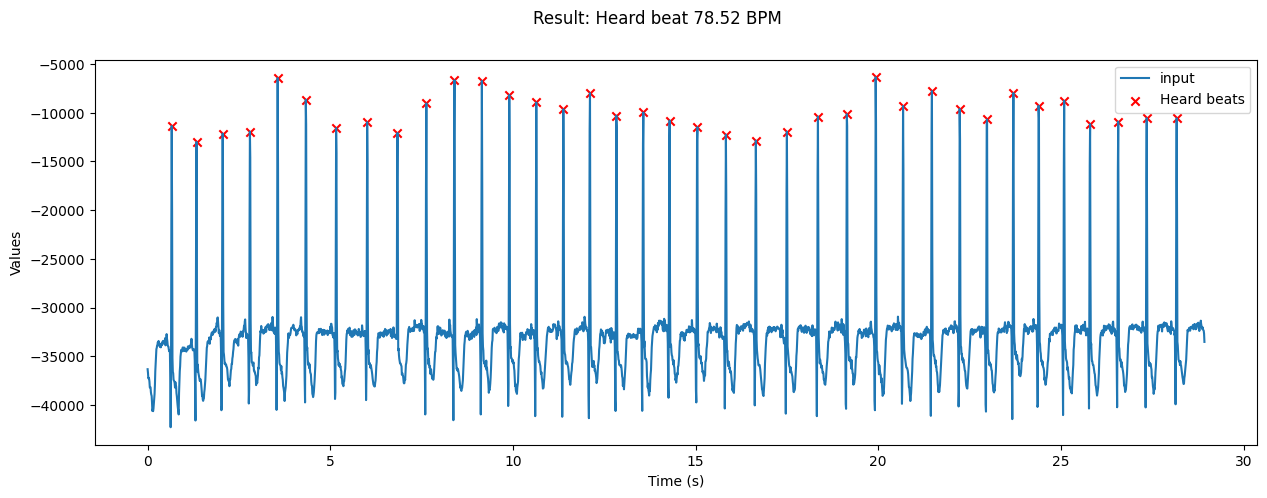

In [5]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data = pd.read_csv('v5_puls_1.csv')

# Werte aus der CSV-Datei extrahieren
d_values = -data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag


# Peaks in der Beschleunigung finden
peaks, _ = find_peaks(d_values, height=-15000, distance=50)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Heard beat {heartbeats:.2f} BPM')

ax1.plot(time_series, d_values, label='input')
ax1.scatter(time_series[peaks], d_values.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()



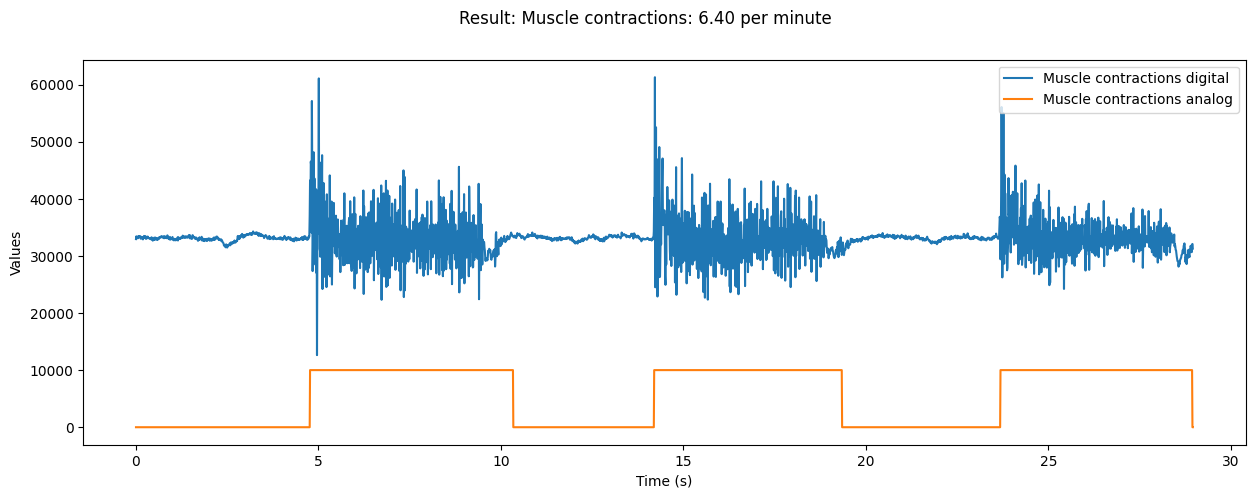

In [38]:
import pandas as pd
from scipy import signal
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data = pd.read_csv('v5_muskel_1.csv')

# Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 1 Millisekunden pro Eintrag

# Beispiel für Anomalieerkennung (Schwellenwert: 2 Standardabweichungen)
mittelwert = np.mean(d_values)

def analog_to_digital(d_values, wind_lenght, range_threshold):
    digital_signal = [0] * len(d_values)  # initialisiere digital_signal mit Nullen

    window_values = []  # Liste, um die letzten 100 Werte zu speichern

    for index, value in enumerate(d_values):
        window_values.append(value)
        if len(window_values) > wind_lenght:
            window_values.pop(0)  # Entferne das älteste Element, wenn die Liste länger als 100 ist

        if len(window_values) == wind_lenght:
            mean = sum(window_values) / wind_lenght  # Mittelwert der letzten 100 Werte
            deviation = max(window_values) - min(window_values)  # Abweichung über die letzten 100 Werte

            if deviation > range_threshold:
                digital_signal[index] = 10000  # Signal detektiert

    return digital_signal

digital_signal = analog_to_digital(d_values, 50, 5000)
peaks, _ = find_peaks(digital_signal,  height=500, distance=500)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Muscle contractions: {breaths:.2f} per minute')

ax1.plot(time_series, d_values, label='Muscle contractions digital')
ax1.plot(time_series, digital_signal, label='Muscle contractions analog')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()